# Q1. 寫一個函式，抓取 Google Finance 的股價歷史資料

In [105]:
import pandas_datareader.data as web
from datetime import datetime

In [106]:
import kchart

In [107]:
import requests
import pandas as pd
import io

In [108]:
def get_data(symbol,startdate):
    url= "http://finance.google.com/finance/historical"
    params = {}
    params['q'] = symbol
    params['startdate'] = startdate 
    params['output'] = 'csv'
    r = requests.get(url , params = params)
    return(r.text)

In [109]:
df = get_data('TSLA',datetime(2017,1,1))

In [110]:
data = pd.read_csv(io.StringIO(df))

In [111]:
data = data.fillna(method="ffill")    #將缺失值填補

In [112]:
data.head()

,Date,Open,High,Low,Close,Volume
0,5-Dec-17,302.00,308.00,301.00,303.70,4646520
1,4-Dec-17,306.50,308.26,300.61,305.20,5835140
2,1-Dec-17,305.44,310.32,305.05,306.53,4292868
3,30-Nov-17,308.56,310.70,304.54,308.85,4351587
4,29-Nov-17,317.30,318.00,301.23,307.54,8767398


# Q2. 抓取台股歷史資料，並繪製價量圖形

In [113]:
data.Date = pd.to_datetime(data.Date)
data.index = data.Date
del data['Date']                          #將日期擺在第一行

In [114]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-12-05,302.00,308.00,301.00,303.70,4646520
2017-12-04,306.50,308.26,300.61,305.20,5835140
2017-12-01,305.44,310.32,305.05,306.53,4292868
2017-11-30,308.56,310.70,304.54,308.85,4351587
2017-11-29,317.30,318.00,301.23,307.54,8767398


In [115]:
data = data.sort_index()             #依日期排序
data.head()                  

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,214.86,220.33,210.96,216.99,5923254
2017-01-04,214.75,228.00,214.31,226.99,11213471
2017-01-05,226.42,227.48,221.95,226.75,5911695
2017-01-06,226.93,230.31,225.45,229.01,5527893
2017-01-09,228.97,231.92,228.00,231.28,3979484


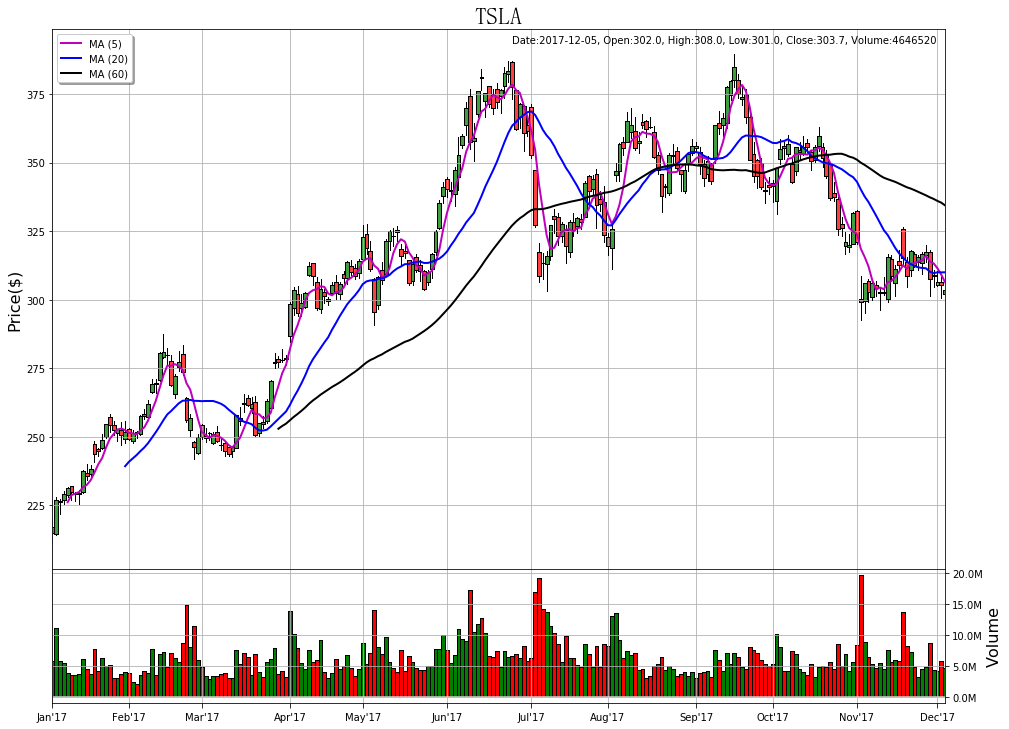

In [116]:
kchart.draw(data,'TSLA')      #利用Q1所寫的函式取值的資料，畫價量圖

In [117]:
data2 = web.DataReader('TSLA', 'yahoo', datetime(2017, 1, 1))

In [118]:
data2 = data2.fillna(method="ffill")    #將缺失值填補

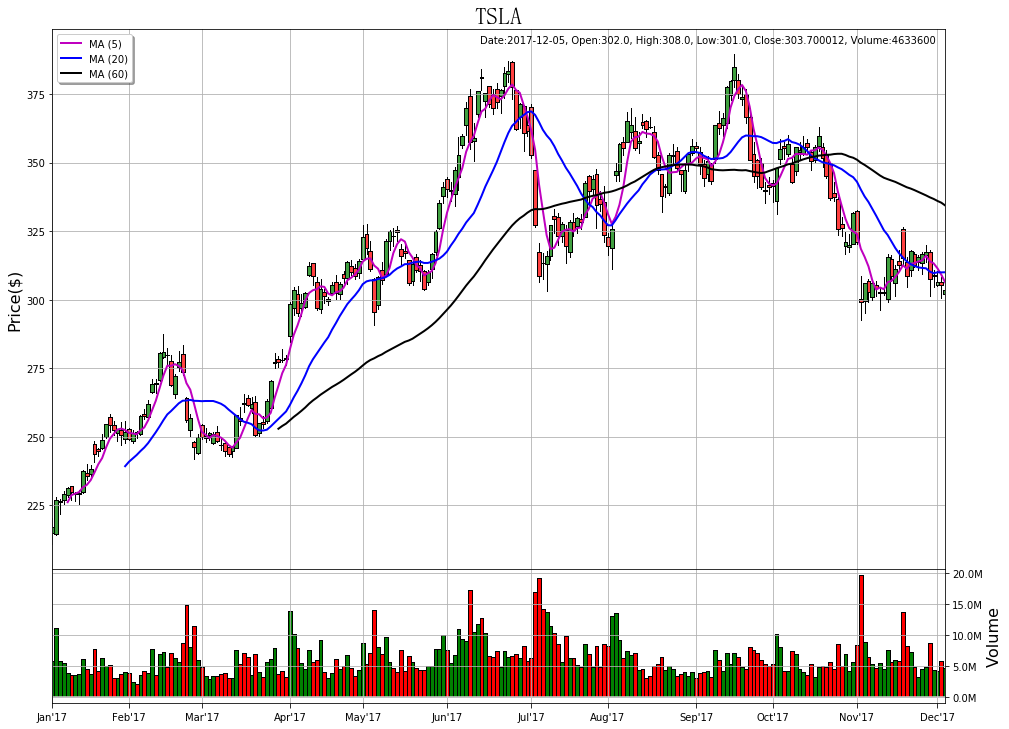

In [120]:
kchart.draw(data2, 'TSLA')        #利用DataReader的yahoo取值的資料畫圖，結果相同